## 1장 실습

iris 데이터를 이용하여 아래 코드와 같이 학습데이터와 평가 데이터를 나누고 KNeighborsClassifier를 분류기를 통해 학습모델을 생성하였다.
```python
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
iris_dataset = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0, stratify=iris_dataset['target'])

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))
```

이때, 초월변수(hyper-parameter) n_neighbor=1로 지정하였는데, 우리는 다양한 초월변수를 통해 best 모델을 선정하고자 한다.

1. train_test_split의 random_state=0으로 설정하고
2. n_neighbors_list = [1, 3, 5, 7, 9]로 하여,
3. n_neighbors_list의 각 성분을 KNeighborsClassifier의 n_neighbors로 설정하여,
4. 정확도가 가장 높은 n_neighbors를 갖는 모델을 best_model로 생성하라.

이를 위해 아래와 같은 코드를 사용하라.

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from copy import deepcopy
import sklearn
iris_dataset = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0, stratify=iris_dataset['target'])

In [35]:
# pass
n_neighbors_list = [1, 3, 5, 7, 9]
knn = KNeighborsClassifier()
best_score = 0.5
best_n_neighbor = 1

In [36]:
for n_neighbor in n_neighbors_list:
    knn.set_params(n_neighbors=n_neighbor)
    knn.fit(X_train, y_train)
    acc = knn.score(X_test, y_test)
    if acc > best_score:
        best_n_neighbor = n_neighbor
        print(acc)
        best_score = acc
        best_model = sklearn.base.clone(knn)

0.9736842105263158
1.0


In [37]:
print("best score = %.4f @ best n_neighbors = %d" %(best_score, best_n_neighbor))

best score = 1.0000 @ best n_neighbors = 3


In [38]:
best_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

## 2장 실습 1
MLRA.sav는 SPSS 데이터셋이다. 이 데이터셋을 이용하여 다중선형회귀를 구현한다.
- 설명변수: age, weight, runtime(1.5마일 달릴 때 걸리는 시간), rstpulse(휴식시 평균 맥박수), runpulse(달릴 때의 평균 맥박수), maxpulse(달릴 때의 최대 맥박 수)
- 종속변수: oxygen(산소 흡수율)

In [2]:
!pip install savReaderWriter

In [1]:
import pandas as pd 
import numpy as np 
import savReaderWriter as spss 

with spss.SavReaderNp("data/MLRA.sav") as reader: 
    records = reader.all() 
    df = pd.DataFrame(records)

df.head()

,id,age,wgt,oxygen,runtime,rstpulse,runpulse,maxpulse
0,1.0,44.0,89.47,44.61,11.37,62.0,178.0,182.0
1,2.0,40.0,75.07,45.31,10.07,62.0,185.0,185.0
2,3.0,44.0,85.84,54.30,8.65,45.0,156.0,168.0
3,4.0,42.0,68.15,59.57,8.17,40.0,166.0,172.0
4,5.0,38.0,89.02,49.87,9.22,55.0,178.0,180.0


In [2]:
features = [col for col in df.columns if col not in ['id', 'oxygen']]
features

['age', 'wgt', 'runtime', 'rstpulse', 'runpulse', 'maxpulse']

In [3]:
X = df.loc[:, features]
y = df['oxygen']

In [4]:
X.head()

,age,wgt,runtime,rstpulse,runpulse,maxpulse
0,44.0,89.47,11.37,62.0,178.0,182.0
1,40.0,75.07,10.07,62.0,185.0,185.0
2,44.0,85.84,8.65,45.0,156.0,168.0
3,42.0,68.15,8.17,40.0,166.0,172.0
4,38.0,89.02,9.22,55.0,178.0,180.0


In [5]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [7]:
knr = KNeighborsRegressor(n_neighbors=3)
tr3_score = knr.fit(X_train, y_train).score(X_train, y_train)
tt3_score = knr.score(X_test, y_test)

In [8]:
print("학습 socre: %.4f" %tr3_score)
print("평가 socre: %.4f" %tt3_score)

학습 socre: 0.5353
평가 socre: -0.0182


In [9]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


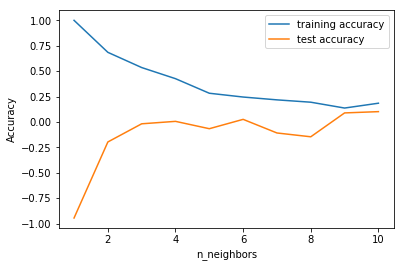

In [10]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(reg.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(reg.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [15]:
X_trminmax = X_train.apply([min, max])
X_trminmax

,age,wgt,runtime,rstpulse,runpulse,maxpulse
min,38.0,66.45,8.17,40.0,146.0,155.0
max,57.0,91.63,13.08,70.0,186.0,188.0


In [18]:
for col in X_train.columns:
    min = X_trminmax.loc['min', col]
    max = X_trminmax.loc['max', col]
    X_train[col] = (X_train[col] - min)/(max - min)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [20]:
X_train.describe()

,age,wgt,runtime,rstpulse,runpulse,maxpulse
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,0.487414,0.446317,0.468609,0.508696,0.629348,0.607378
std,0.281744,0.278258,0.253748,0.259607,0.243162,0.255743
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.289474,0.274821,0.311609,0.266667,0.500000,0.454545
50%,0.578947,0.436855,0.468432,0.533333,0.650000,0.636364
75%,0.684211,0.603455,0.605906,0.733333,0.775000,0.787879
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
for col in X_train.columns:
    min = X_trminmax.loc['min', col]
    max = X_trminmax.loc['max', col]
    X_test[col] = (X_test[col] - min)/(max - min)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [22]:
X_test.describe()

,age,wgt,runtime,rstpulse,runpulse,maxpulse
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,0.572368,0.408807,0.559827,0.275000,0.481250,0.458333
std,0.258512,0.473638,0.364115,0.135401,0.277666,0.325745
min,0.315789,-0.292693,0.097760,0.133333,0.050000,0.000000
25%,0.355263,0.144261,0.343177,0.166667,0.362500,0.318182
50%,0.500000,0.448173,0.447047,0.250000,0.500000,0.393939
75%,0.763158,0.788125,0.748473,0.325000,0.562500,0.545455
max,1.000000,1.000000,1.193483,0.533333,1.000000,1.121212


표준화한 데이터로 다시 한번 회귀를 시도하자.

In [23]:
knr2 = KNeighborsRegressor(n_neighbors=3)
tr3_score2 = knr2.fit(X_train, y_train).score(X_train, y_train)
tt3_score2 = knr2.score(X_test, y_test)

In [24]:
print("학습 socre: %.4f" %tr3_score2)
print("평가 socre: %.4f" %tt3_score2)

학습 socre: 0.5261
평가 socre: 0.1413


In [25]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

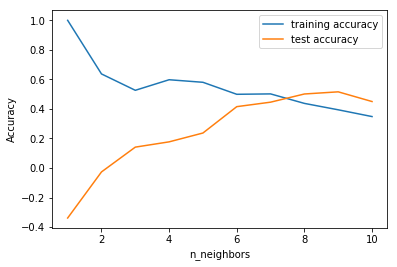

In [26]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(reg.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(reg.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

## 2장 실습 2
boston housing 데이터를 이용하여 testset score를 0.77 이상으로 올려보자.

## 2장 실습 3
![](https://tensorflowkorea.files.wordpress.com/2017/06/2-13.png?w=625)
1. p82 그림 2-13은 보스턴 주택가격 데이터셋에 대한 릿지 회귀와 선형 회귀의 학습 곡선이다. 이 학습곡선에 대해 normalize=True를 주었을 때, Ridge와 LASSO의 학습곡선을 그려라.

2. 이 학습곡선에 cancer 데이터에 대해 LogisticRegression과 LinearSVC로 학습곡선을 그려라.

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처. plt.rcParams을 쓰지 말것.
mpl.rcParams['axes.unicode_minus'] = False
# 한글 폰트의 적용
plt.rc('font', family='Malgun Gothic')

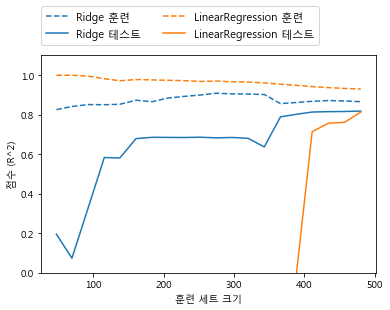

In [3]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
import sklearn
import mglearn
mglearn.plots.plot_ridge_n_samples()

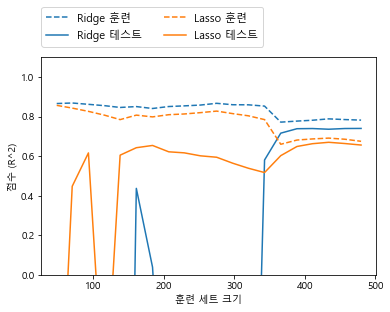

In [3]:
X, y = mglearn.datasets.load_extended_boston()

mglearn.plot_ridge.plot_learning_curve(Ridge(alpha=1, normalize=True), X, y)
mglearn.plot_ridge.plot_learning_curve(Lasso(alpha=0.1, normalize=True), X, y)
plt.legend(loc=(0, 1.05), ncol=2, fontsize=11)

2. cancer 데이터에 LogisticRegression과 LinearSVC로 학습곡선을 그려보면:

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conve

C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conve

C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conve

C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conve

C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conve

C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conve

C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conve

C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conve

C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conve

C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conve

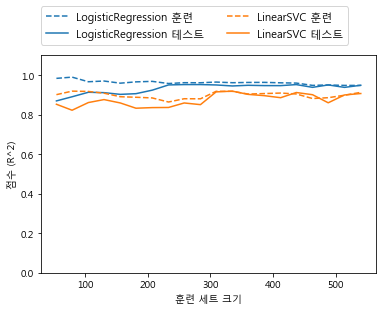

In [5]:
mglearn.plot_ridge.plot_learning_curve(LogisticRegression(C=1, n_jobs=-1, solver='lbfgs'), 
                                       cancer.data, cancer.target)
mglearn.plot_ridge.plot_learning_curve(LinearSVC(C=1, max_iter=3000), 
                                       cancer.data, cancer.target)
plt.legend(loc=(0, 1.05), ncol=2, fontsize=11)

### 실습 4
확장된 보스턴 주택가격 데이터셋에 대해 DTRegresser를 이용하여 학습 데이터로 학습을 수행하고, 테스트 데이터를 통해 그 결과를 이전의 Ridge와 Lasso와 비교해보자.

In [8]:
import sklearn
import mglearn
import numpy as np

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [29]:
dtr = DecisionTreeRegressor(max_depth=4)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [30]:
dtr.score(X_train, y_train)

0.9215375804213246

In [31]:
dtr.score(X_test, y_test)

0.6766973996107217

In [38]:
dtr = DecisionTreeRegressor(max_depth=4, min_samples_split=15)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=15, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [39]:
dtr.score(X_train, y_train)

0.9212776198106704

In [40]:
dtr.score(X_test, y_test)

0.6753919549522363